In [2]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import utils
import math

dataDir = "c:/Users/llave/Documents/CMS/data/electron_selection_compressed/"

Using TensorFlow backend.


In [4]:
e_max = np.load("e_max.npy")
bkg_max = np.load("bkg_max.npy")

e_max = np.transpose(e_max)
bkg_max = np.transpose(bkg_max)

In [5]:
veti,bkg_failVeto,bkg_passVeto=[],[],[]
e_failVeto,e_passVeto=[],[]
for i,veto in enumerate(np.arange(0,22)):
    tempFail, tempPass = 0,0
    for iRow, row in enumerate(bkg_max):
        pixel = np.sum(row)
        if(abs(iRow-20) < veto):
            tempPass+=pixel
        else:
            tempFail+=pixel
            
    veti.append(veto)
    bkg_failVeto.append(tempFail)
    bkg_passVeto.append(tempPass)
    
    tempFail, tempPass = 0,0
    for iRow, row in enumerate(e_max):
        pixel = np.sum(row)
        if(abs(iRow-20) < veto):
            tempPass+=pixel
        else:
            tempFail+=pixel
    e_failVeto.append(tempFail)
    e_passVeto.append(tempPass)

In [6]:
f_bkg_failVeto = bkg_failVeto/np.sum(bkg_max)
f_bkg_passVeto = bkg_passVeto/np.sum(bkg_max)
f_e_failVeto = e_failVeto/np.sum(e_max)
f_e_passVeto = e_passVeto/np.sum(e_max)

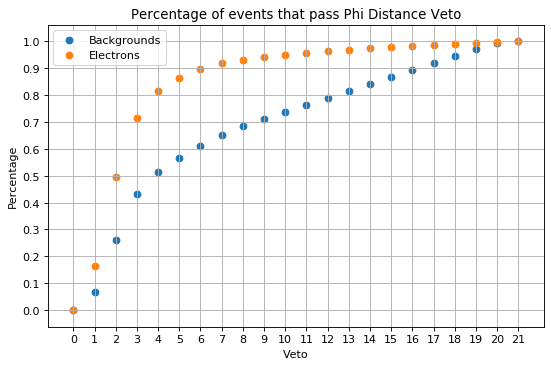

In [7]:
%matplotlib inline
#plt.scatter(veti, bkg_failVeto, label="Backgrounds that fail the Veto")
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(veti, f_bkg_passVeto, label="Backgrounds")
#plt.scatter(veti, e_failVeto, label="Electrons that fail the Veto")
plt.scatter(veti, f_e_passVeto, label="Electrons")
plt.title("Percentage of events that pass Phi Distance Veto")
plt.xlabel("Veto")
plt.ylabel("Percentage")
plt.xticks(np.arange(0,22,1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid(True)
plt.legend()
plt.show()

In [8]:
print(f_e_failVeto[20], e_failVeto[20])

0.0010187333748372857 18.0


In [9]:
print(f_bkg_failVeto[20], bkg_failVeto[20])

0.0069530091212854205 10627.0


In [10]:
dists,bkg_dist,e_dist=[],[],[]
for i,dist in enumerate(np.arange(0,40)):
    temp = 0
    for iRow, row in enumerate(bkg_max):
        pixel = np.sum(row)
        if(iRow == dist):
            temp+=pixel
            
    bkg_dist.append(temp)
    
    temp = 0
    for iRow, row in enumerate(e_max):
        pixel = np.sum(row)
        if(iRow == dist):
            temp+=pixel
            
    e_dist.append(temp)
    
    dists.append(dist)

In [11]:
f_bkg_dist = bkg_dist/np.sum(bkg_max)
f_e_dist = e_dist/np.sum(e_max)

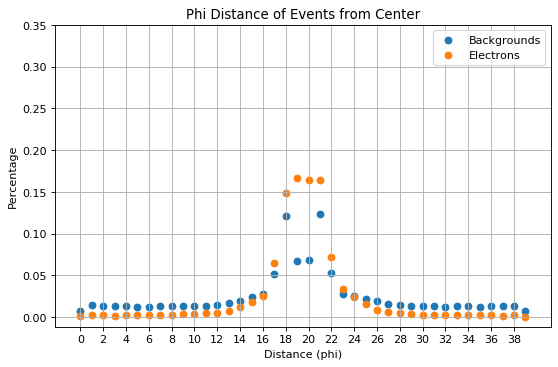

In [12]:
#plt.scatter(veti, bkg_failVeto, label="Backgrounds that fail the Veto")
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(dists, f_bkg_dist, label="Backgrounds")
#plt.scatter(veti, e_failVeto, label="Electrons that fail the Veto")
plt.scatter(dists, f_e_dist, label="Electrons")
plt.title("Phi Distance of Events from Center")
plt.xlabel("Distance (phi)")
plt.ylabel("Percentage")
plt.xticks(np.arange(0,40,2))
plt.yticks(np.arange(0,0.4,0.05))
plt.grid(True)
plt.legend()